---

## Homework


Can you make a perfect classifier? Let's consider the next dataset:

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import time
from IPython import display
from sklearn.model_selection import ParameterGrid
import pandas as pd

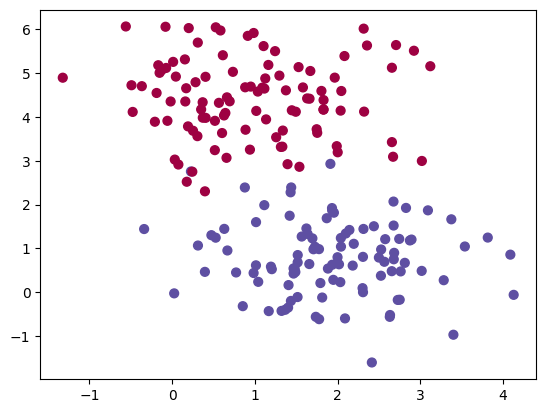

X.shape= (200, 2)


In [111]:
np.random.seed(0)
N = 200
X_test, y_test = sklearn.datasets.make_blobs(N, centers=2, cluster_std=0.9)

def show_scatter(x, y):
    plt.scatter(x[:,0], x[:,1], s=40, c=y, cmap=plt.cm.Spectral)
    plt.show()
    
show_scatter(X_test, y_test)
print('X.shape=', X_test.shape)

#### 1. Try to tune the learning rate and number of iterations
*What is the lowest error with the current approach?*

Add early stopping to find the optimal number of iterations automatically.

Visualize the decision boundary

steps= 31 error= 0.065 w= [ 256.10059941 -161.0036358 ]


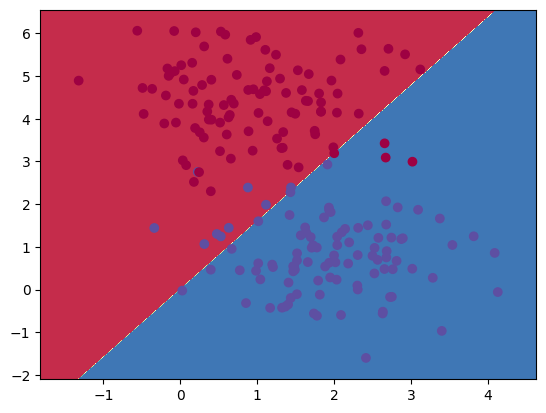

In [112]:
def activation(x):
    return np.where( x > 0 , 1, 0)

def perceptron(w, x):
    return activation(w @ x.T).T


def get_error(w, x, y):
    return y - perceptron(w, x)


def get_weigth_adjustment(lr, error, x):
    return lr * (error.T @ x)


def run_perceptron(x, y, lr, max_iterations_wo_improvement = 20, max_iterations = 100):    
    w = np.random.random(x.shape[1])
    
    error = get_error(w, x, y)
    error_mean = np.mean(np.abs(error))
    
    best_error_mean = error_mean
    best_w = w
    iterations_to_best = 1
    iterations_since_best = 0

    # Limiting number of iterations to avoid infinite loop
    for j in range(max_iterations): # First has been already taken
        
        # If we're lucky and hit zero error - stop
        if error_mean == 0:
            break
            
        # Give up if we're not improving for a long time
        if iterations_since_best >= max_iterations_wo_improvement:
            break
        
        w = w + get_weigth_adjustment(lr, error, x)
        error = get_error(w, x, y)
        new_error_mean = np.mean(np.abs(error))
        
        iterations_since_best += 1
        
        # Store parameters of the best result
        if new_error_mean < best_error_mean:  
            best_error_mean = new_error_mean
            best_w = w
            iterations_to_best = j + 2 # +1 for first iteration, +1 for 0-based index
            iterations_since_best = 0
            
        # Vuisualize if human is watching the progress
        if is_interactive:
            display.clear_output(wait=True)
            plot_decision_boundary(x, y, lambda x: perceptron(w, x))
            print('j=', j+2, 'error_mean=', new_error_mean, 'best_error_mean=', best_error_mean, 'lr=', lr, 'w=', w)
            time.sleep(0.2)
        
        error_mean = new_error_mean
    
    return best_w, best_error_mean, iterations_to_best + iterations_since_best


def plot_decision_boundary(x, y, pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
    y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()


# is_interactive = True
is_interactive = False

np.random.seed(0)
N = 200
X_test, y_test = sklearn.datasets.make_blobs(N, centers=2, cluster_std=0.9)

w, error_mean, steps = run_perceptron(X_test, y_test, 1)

display.clear_output(wait=True)
print('steps=', steps, 'error=', error_mean, 'w=', w)

plot_decision_boundary(X_test, y_test, lambda x: perceptron(w, x))

#### 2. It's time to add learnable bias
*What is the lowest error now?*

Visualize the decision boundary

steps= 161 error= 0.015 w= [ 34.78014428 -97.62499127 208.115834  ]


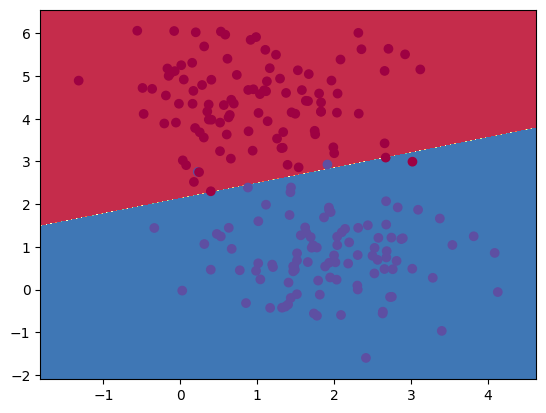

In [113]:
def add_ones(x):
    return np.concatenate((x, np.ones((x.shape[0], 1))), axis=1)


def plot_decision_boundary(x, y, pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
    y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    x_m = np.c_[xx.ravel(), yy.ravel()]
    Z = pred_func(add_ones(x_m))
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()    


#is_interactive = True
is_interactive = False

np.random.seed(0)
N = 200
X_test, y_test = sklearn.datasets.make_blobs(N, centers=2, cluster_std=0.9)

X_test_1 = add_ones(X_test)
w, error_mean, steps = run_perceptron(X_test_1, y_test, 1, 100, 200)

display.clear_output(wait=True)
print('steps=', steps, 'error=', error_mean, 'w=', w)
plot_decision_boundary(X_test, y_test, lambda x: perceptron(w, x))

#### 3*. Let's expand it for three classes

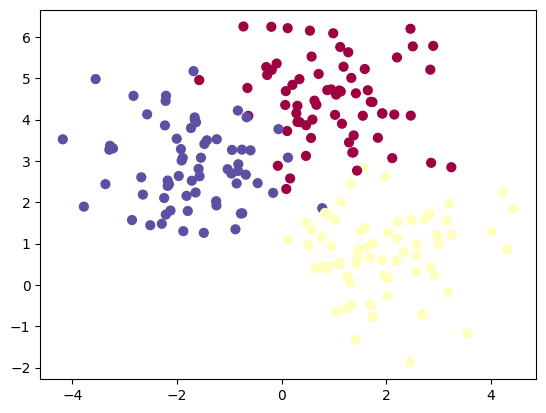

In [114]:
np.random.seed(0)
# X, y = sklearn.datasets.make_moons(200, noise=0.20)
x, y = sklearn.datasets.make_blobs(200)
plt.scatter(x[:,0], x[:,1], s=40, c=y, cmap=plt.cm.Spectral)

**Idea:** we need to train weights for each class 

\begin{equation}
y_p =   \underset{c \,=\, 0,...,C-1}{\text{argmax}} \,\,\,\mathring{\mathbf{x}}_{p}^T \mathbf{w}_c^{\,}.
\end{equation}

Visualize the decision boundary

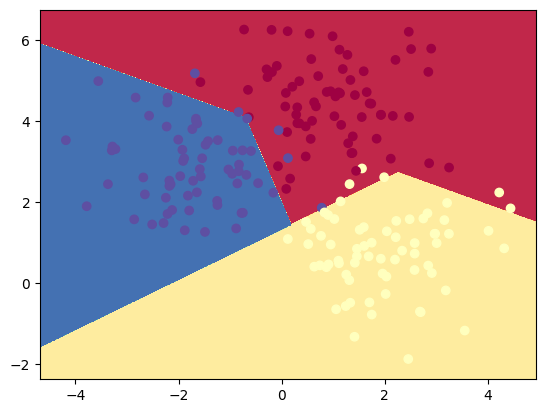

In [115]:
# One vs many approach

def one_hot_encode(y, dim):
    return np.eye(dim)[y]


def predict_class(w, x):
    y = perceptron(w, x)
    return np.argmax(y, axis=1)


def plot_decision_boundary(x, y, pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
    y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    x_m = np.c_[xx.ravel(), yy.ravel()]
    Z = pred_func(add_ones(x_m))
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()    
    
    
def run_perceptron(x, y, lr, max_iterations_wo_improvement = 20, max_iterations = 100):    
    w = np.random.random((x.shape[1], y.shape[1]))
    
    error = get_error(w, x, y)
    error_mean = np.mean(np.abs(error))
    
    best_error_mean = error_mean
    best_w = w
    iterations_to_best = 1
    iterations_since_best = 0

    # Limiting number of iterations to avoid infinite loop
    for j in range(max_iterations): # First has been already taken
        
        # If we're lucky and hit zero error - stop
        if error_mean == 0:
            break
            
        # Give up if we're not improving for a long time
        if iterations_since_best >= max_iterations_wo_improvement:
            break
        
        wd = get_weigth_adjustment(lr, error, x)
        w = w + wd
        error = get_error(w, x, y)
        new_error_mean = np.mean(np.abs(error))
        
        iterations_since_best += 1
        
        # Store parameters of the best result
        if new_error_mean < best_error_mean:  
            best_error_mean = new_error_mean
            best_w = w
            iterations_to_best = j + 2 # +1 for first iteration, +1 for 0-based index
            iterations_since_best = 0
            
        error_mean = new_error_mean
    
    return best_w


np.random.seed(0)
N = 200
X, y = sklearn.datasets.make_blobs(N)

X_1 = add_ones(X)
y_encoded = one_hot_encode(y, 3)

w = run_perceptron(X_1, y_encoded, 1, 500, 1000)
plot_decision_boundary(X, y, lambda x: predict_class(w, x))
